In [2]:
import pylab
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import yeojohnson
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

## Nifty index values for a year during normal market

In [3]:
data = pd.read_csv("normal market.csv")
print("Nifty between {} to {}".format(data["Date"].iloc[0],data["Date"].iloc[-1]))
data

Nifty between 01-Aug-16 to 31-Jul-17


,Date,Price,Open,High,Low,Volume,Chg%
0,01-Aug-16,8636.55,8654.30,8711.30,8590.50,194.19M,-0.02%
1,02-Aug-16,8622.90,8647.45,8687.20,8611.40,174.56M,-0.16%
2,03-Aug-16,8544.85,8635.20,8635.45,8529.60,168.03M,-0.91%
3,04-Aug-16,8551.10,8599.95,8601.40,8518.15,169.78M,0.07%
4,05-Aug-16,8683.15,8600.20,8689.40,8590.15,162.78M,1.54%
...,...,...,...,...,...,...,...
243,25-Jul-17,9964.55,10010.55,10011.30,9949.10,191.21M,-0.02%
244,26-Jul-17,10020.65,9983.65,10025.95,9965.95,203.70M,0.56%
245,27-Jul-17,10020.55,10063.25,10114.85,10005.50,296.78M,0.00%
246,28-Jul-17,10014.50,9996.55,10026.05,9944.50,197.49M,-0.06%


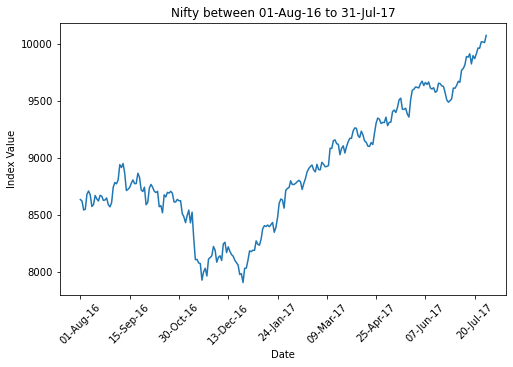

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(data["Date"],data["Price"])
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("Nifty between {} to {}".format(data["Date"].iloc[0],data["Date"].iloc[-1]))
ax=plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)
plt.show()

In [5]:
# Calculating log return of index
data["LogReturn"] = np.log(data["Price"]).shift(-1) - np.log(data["Price"])
data.dropna(inplace=True)
print("Number of rows: {}".format(data.shape[0]))
data.head(5)

Number of rows: 247


,Date,Price,Open,High,Low,Volume,Chg%,LogReturn
0,01-Aug-16,8636.55,8654.30,8711.30,8590.50,194.19M,-0.02%,-0.001582
1,02-Aug-16,8622.90,8647.45,8687.20,8611.40,174.56M,-0.16%,-0.009093
2,03-Aug-16,8544.85,8635.20,8635.45,8529.60,168.03M,-0.91%,0.000731
3,04-Aug-16,8551.10,8599.95,8601.40,8518.15,169.78M,0.07%,0.015324
4,05-Aug-16,8683.15,8600.20,8689.40,8590.15,162.78M,1.54%,0.003242


## Distribution of Index log-returns

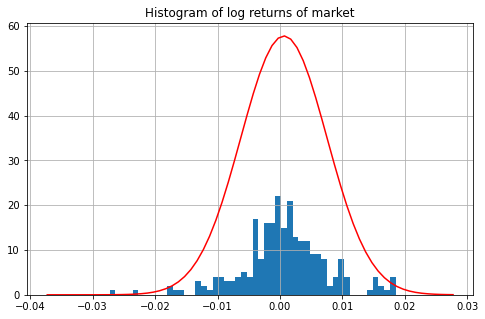

In [6]:
mu = data["LogReturn"].mean()
sigma = data["LogReturn"].std(ddof=1)

density = pd.DataFrame()
density["x"] = np.arange(data["LogReturn"].min()-0.01, data["LogReturn"].max()+0.01, 0.001)
density["pdf"] = norm.pdf(density["x"], mu, sigma)

data["LogReturn"].hist(bins=50, figsize=(8, 5))
plt.plot(density["x"], density["pdf"], color="red")
plt.title("Histogram of log returns of market")
plt.show()

## Checks for normality of distribution

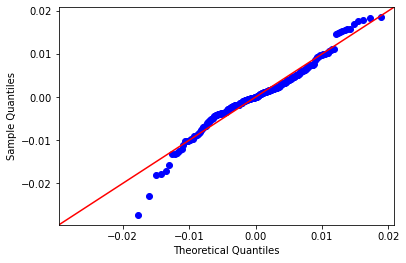

In [7]:
# QQ plot
qqplot(data["LogReturn"], loc=mu, scale=sigma, line="45")
plt.show()

In [8]:
# Shapiro Wilk normality test
# H0: Distribution is normal

stat, p = shapiro(data["LogReturn"])
print("Statistics = {:.3f}, p = {:.3f}".format(stat, p))
alpha = 0.05
if p > alpha:
    print("Sample looks normal distributed (do not reject H0)")
else:
    print("Sample does not look normally distributed (reject H0)")

Statistics = 0.969, p = 0.000
Sample does not look normally distributed (reject H0)


In [9]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
# Normality test based on D’Agostino and Pearson’s test

k2, p = normaltest(data["LogReturn"])
print("p = {}".format(p))
alpha = 0.05
if p > alpha:
    print("Sample looks normal distributed (do not reject H0)")
else:
    print("Sample does not look normally distributed (reject H0)")

p = 0.00045243775826893975
Sample does not look normally distributed (reject H0)


**The distribution does not seem to be distributed normally.**